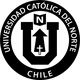

# Laboratorio S02-1: Clasificación Lineal y Redes Neuronales

## Tópicos avanzados en _Data Science_

**Profesor**: Dr. Juan Bekios Calfa

**Grado**: Diplomado en _Big Data_

# Laboratorio 02: Clasificación Lineal y Redes Neuronales

Objetivo:

1.   Implementar una regresión logística
2.   Implementar una red neuronal simple como **regresor**



## 1. Regresión logística

Clasificación binaria utilizando regresión logística. Implementado en Pytorch.



In [ ]:
# Librerías

import torch.nn as nn
import torch
import numpy as np
from sklearn import datasets # Base de datos que vamos a utilizar
from sklearn.preprocessing import StandardScaler # Escalar los datos de entrada
from sklearn.model_selection import train_test_split # Crear el conjunto de entrenamiento y pruebas

In [ ]:
# 0) Preparar los datos
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

print(f'Número ejemplos:{n_samples}, Número de características:{n_features}')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Escalar
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # Entrenar
#X_train = sc.transform(X_train) # Conjunto de entrenamiento va quedar escalado
X_test = sc.transform(X_test) # Conjunto de prueba escalado

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [ ]:
# 1) Modelo
class Model(nn.Module):
  # Declarar las partes del modelo
  def __init__(self, n_input_features):
    super(Model, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  # Calcular la estimacion (x <- vector de entrada)
  def forward(self,x):
    y_pred = torch.sigmoid(self.linear(x))
    return y_pred

model = Model(n_features)

# 2) Loss y optimizar
num_epochs = 100
learning_rate = 0.02
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 3) Ciclo entrenamiento
for epoch in range(num_epochs):
  # Forward 
  y_pred = model(X_train)
  loss = criterion(y_pred, y_train) # Error

  # Calcular gradientes
  loss.backward()
  optimizer.step()

  # Cero los gradientes
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1},, loss = {loss.item():.4f}')

# 4) Comparar con el conjunto de pruebas
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() /float(y_test.shape[0])
  print(f'Tasa de acierto: {acc.item():.4f}')

## 2. Red neuronal poco profunda

Regresión utilizando una red neuronal poca profunda. Implementada en Pytorch.

El problema tiene solo **un atributo de entrada** y una **etiquta de salida**.

### Librerías

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

### Definir el modelo neuronal


In [ ]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(1, 2, bias=True)
    self.fc2 = nn.Linear(2, 1, bias=True)

  # Prediccion
  def forward(self, x):
    x = self.fc2(F.relu(self.fc1(x)))
    return x

### Parámetros de optimización

In [ ]:
net = Net().cuda()

### Definir una base de datos hipotética

In [ ]:
print(net)

### Visualizar modelo con sus dimensiones y parámetros

In [ ]:
from torchsummary import summary

summary(net, input_size=(1,))

### Entrenamiento de la red

In [ ]:
print(list(net.parameters()))

In [ ]:
# Variable de entrada

input = Variable(torch.randn(1,1,1)).cuda()
print(f'Entrada: {input}')

In [ ]:
# Dejar los gradientes en cero
net.zero_grad()

In [ ]:
out = net(input)
print(out)

# Entrenar

In [ ]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.4)
criterion = nn.MSELoss()

In [ ]:
# Base de datos
data = [(1,3), (2, 6), (3,9), (4, 12), (5, 15), (6,18)]

### Visualizar los datos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

point = np.array(data)

plt.plot(point[:,0], point[:,1], marker='o')

plt.xlabel('Eje X: Variable independiente')
plt.ylabel('Eje Y: Variable depenldiente')
plt.title('Gráfico regresión')

In [ ]:
for epoch in range(300):
  for i, data2 in enumerate(data):
    X, Y = iter(data2)
    X, Y = Variable(torch.FloatTensor([X]), requires_grad=True).cuda(), Variable(torch.FloatTensor([Y]), requires_grad=False).cuda()
    optimizer.zero_grad()
    y_pred =  net(X)
    output = criterion(y_pred, Y)
    output.backward()
    optimizer.step()

  if (epoch % 20 == 0.0):
    print('Epoch {} - loss: {}'.format(epoch, output))


### Visualizar los parámetros aprendidos

In [ ]:

print(list(net.parameters()), end='\n\n')

# Listar los atributos de los parámetros
for param in net.parameters():
    print(type(param.data), param.size())

### Hacer una predicción sobre el modelo de regresión


In [ ]:
# Predicción
with torch.no_grad():

  new_data = Variable(torch.FloatTensor([2]), requires_grad=True).cuda()
  pred = net(new_data)
  print(pred)